**Course:** Neural Computing and Deep Learning
---
**Title:** Project 2
---
**Mahdi Mirfendereski - 401131065**
---


# Libraries

In [2]:
import numpy as np
import math
import json
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.utils import plot_model
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Datasets

In [3]:
df = pd.read_csv('../Inputs/Fire.csv')
df

,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
0,Melbourne,NaN,NaN,NaN,2.6,4.2,SW,43.0,SW,S,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Darwin,26.7,32.0,3.6,8.0,3.0,W,39.0,W,WNW,...,22.0,75.0,72.0,1007.6,1005.4,6.0,7.0,29.4,29.9,No
2,WaggaWagga,15.0,29.3,NaN,NaN,NaN,WNW,61.0,NNE,W,...,33.0,78.0,17.0,1007.8,1007.4,1.0,NaN,21.6,28.6,NaN
3,Townsville,24.0,30.0,4.0,8.0,NaN,ENE,61.0,ESE,E,...,13.0,77.0,77.0,1010.1,1007.2,8.0,7.0,29.0,29.0,Yes
4,Wollongong,21.5,22.2,0.2,NaN,NaN,N,50.0,SE,SW,...,13.0,86.0,93.0,1011.7,1010.5,8.0,8.0,22.1,19.3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,8.2,16.8,6.4,2.2,2.4,W,57.0,NW,WNW,...,22.0,55.0,68.0,1010.3,1010.1,5.0,8.0,15.2,15.1,Yes
69995,Williamtown,7.5,17.5,0.0,6.4,10.8,WNW,41.0,WNW,SSE,...,19.0,57.0,39.0,1021.9,1022.1,1.0,2.0,12.7,15.8,No
69996,AliceSprings,26.8,38.9,0.0,11.2,6.0,N,69.0,E,SW,...,35.0,21.0,58.0,1006.3,1003.5,6.0,8.0,33.5,27.5,Yes
69997,Brisbane,16.6,27.9,8.4,0.0,8.7,NaN,NaN,SW,SW,...,2.0,83.0,49.0,1016.8,1013.3,1.0,3.0,20.4,27.2,NaN


# 1) Preprocessing

## 1-A (Missing values)

{'Home-Loc', 'FireAlarm', 'RedLightDir1', 'SteamDir', 'RedLightDir2'}


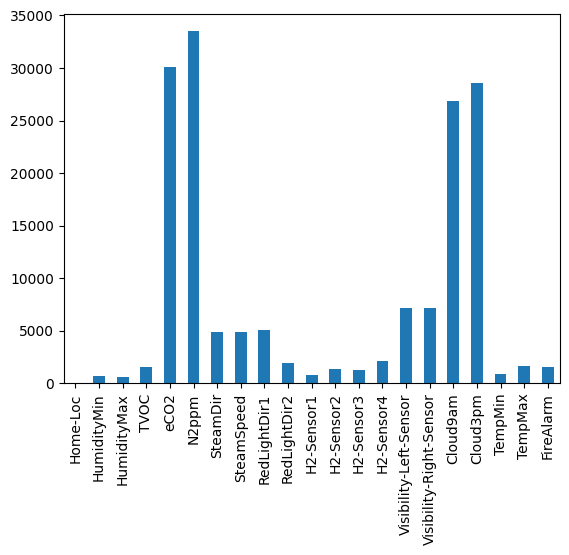

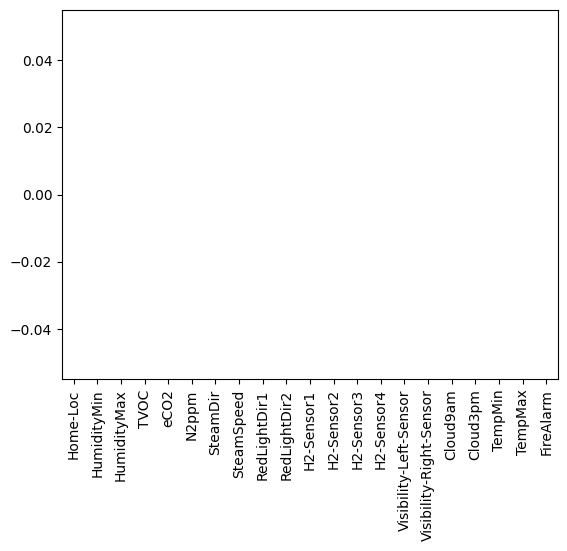

Home-Loc                   0
HumidityMin                0
HumidityMax                0
TVOC                       0
eCO2                       0
N2ppm                      0
SteamDir                   0
SteamSpeed                 0
RedLightDir1               0
RedLightDir2               0
H2-Sensor1                 0
H2-Sensor2                 0
H2-Sensor3                 0
H2-Sensor4                 0
Visibility-Left-Sensor     0
Visibility-Right-Sensor    0
Cloud9am                   0
Cloud3pm                   0
TempMin                    0
TempMax                    0
FireAlarm                  0
dtype: int64


,Home-Loc,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamDir,SteamSpeed,RedLightDir1,RedLightDir2,...,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax,FireAlarm
1,Darwin,26.7,32.0,3.600000,8.000000,3.000000,W,39.000000,W,WNW,...,22.0,75.0,72.0,1007.6,1005.4,6.0,7.000000,29.4,29.9,No
2,WaggaWagga,15.0,29.3,2.287304,5.458219,7.613094,WNW,61.000000,NNE,W,...,33.0,78.0,17.0,1007.8,1007.4,1.0,4.502414,21.6,28.6,No
3,Townsville,24.0,30.0,4.000000,8.000000,7.613094,ENE,61.000000,ESE,E,...,13.0,77.0,77.0,1010.1,1007.2,8.0,7.000000,29.0,29.0,Yes
4,Wollongong,21.5,22.2,0.200000,5.458219,7.613094,N,50.000000,SE,SW,...,13.0,86.0,93.0,1011.7,1010.5,8.0,8.000000,22.1,19.3,Yes
5,Sydney,9.4,17.7,0.000000,2.400000,2.700000,W,24.000000,WNW,N,...,13.0,85.0,56.0,1020.8,1015.0,6.0,6.000000,10.2,17.3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,Sale,8.2,16.8,6.400000,2.200000,2.400000,W,57.000000,NW,WNW,...,22.0,55.0,68.0,1010.3,1010.1,5.0,8.000000,15.2,15.1,Yes
69995,Williamtown,7.5,17.5,0.000000,6.400000,10.800000,WNW,41.000000,WNW,SSE,...,19.0,57.0,39.0,1021.9,1022.1,1.0,2.000000,12.7,15.8,No
69996,AliceSprings,26.8,38.9,0.000000,11.200000,6.000000,N,69.000000,E,SW,...,35.0,21.0,58.0,1006.3,1003.5,6.0,8.000000,33.5,27.5,Yes
69997,Brisbane,16.6,27.9,8.400000,0.000000,8.700000,W,39.924797,SW,SW,...,2.0,83.0,49.0,1016.8,1013.3,1.0,3.000000,20.4,27.2,No


In [4]:
categ_cols = set(df.columns) - set(df._get_numeric_data().columns)
print(categ_cols)
num_col = list(df._get_numeric_data().columns)
pd.options.mode.chained_assignment = None  # default='warn'
missed_values = df.isna().sum()
missed_values.plot.bar()
plt.show()
df_a = df.dropna(thresh=14)
# df_a.isna().sum().plot.bar()
# plt.show()
## categorical
imputer_mode = SimpleImputer(strategy='most_frequent')
for categ_col in categ_cols:
    df_a[categ_col] = imputer_mode.fit_transform(df_a[categ_col].values.reshape(-1,1))[:,0].copy()

## numerical
imputer_mean = SimpleImputer(strategy='mean')
df_a[num_col] = imputer_mean.fit_transform(df_a[num_col])

df_a.isna().sum().plot.bar()
plt.show()
print(df_a.isna().sum())

df_a

## 1-B (Normalization)

In [5]:
## Normalization
scaler = StandardScaler()
scaler.fit(df_a[num_col])
scaled = scaler.fit_transform(df_a[num_col])
scaled_df = pd.DataFrame(scaled, columns=num_col)
# concat
df_a_categ = pd.DataFrame(df_a[list(categ_cols)])
df_a_categ.reset_index(drop=True, inplace=True)
scaled_df.reset_index(drop=True, inplace=True)
df_b = pandas.concat([df_a_categ, scaled_df], axis=1)
df_b.reset_index()

# check
print(df_a_categ.shape)
print(scaled_df.shape)
print(df_b.shape)
# check
print(df_b.isna().sum())

df_b

(67840, 5)
(67840, 16)
(67840, 21)
Home-Loc                   0
FireAlarm                  0
RedLightDir1               0
SteamDir                   0
RedLightDir2               0
HumidityMin                0
HumidityMax                0
TVOC                       0
eCO2                       0
N2ppm                      0
SteamSpeed                 0
H2-Sensor1                 0
H2-Sensor2                 0
H2-Sensor3                 0
H2-Sensor4                 0
Visibility-Left-Sensor     0
Visibility-Right-Sensor    0
Cloud9am                   0
Cloud3pm                   0
TempMin                    0
TempMax                    0
dtype: int64


,Home-Loc,FireAlarm,RedLightDir1,SteamDir,RedLightDir2,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,...,H2-Sensor1,H2-Sensor2,H2-Sensor3,H2-Sensor4,Visibility-Left-Sensor,Visibility-Right-Sensor,Cloud9am,Cloud3pm,TempMin,TempMax
0,Darwin,No,W,W,WNW,2.263824,1.232133,1.631659e-01,8.020926e-01,-1.670323e+00,...,0.902035,0.377119,0.331972,0.999414,-1.477489,-1.462059,0.688005,1.178664e+00,1.907278,1.188243
1,WaggaWagga,No,NNE,WNW,W,0.434927,0.850623,5.519952e-17,-2.802764e-16,3.215942e-16,...,-0.572100,1.631343,0.490336,-1.672940,-1.448127,-1.165755,-1.508184,-4.191501e-16,0.706645,0.999492
2,Townsville,Yes,ESE,ENE,E,1.841771,0.949533,2.128852e-01,8.020926e-01,3.215942e-16,...,-0.345310,-0.649065,0.437548,1.242356,-1.110462,-1.195385,1.566480,1.178664e+00,1.845707,1.057570
3,Wollongong,Yes,SE,N,SW,1.450981,-0.152606,-2.594483e-01,-2.802764e-16,3.215942e-16,...,0.561850,-0.649065,0.912641,2.019768,-0.875564,-0.706482,1.566480,1.650585e+00,0.783609,-0.350802
4,Sydney,No,WNW,W,N,-0.440443,-0.788456,-2.843079e-01,-9.650614e-01,-1.778947e+00,...,0.108270,-0.649065,0.859853,0.222002,0.460416,-0.039796,0.688005,7.067424e-01,-1.048124,-0.641188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67835,Sale,Yes,NW,W,WNW,-0.628022,-0.915626,5.112010e-01,-1.028174e+00,-1.887572e+00,...,1.809195,0.377119,-0.723791,0.805061,-1.081100,-0.765743,0.248767,1.650585e+00,-0.278489,-0.960612
67836,Williamtown,No,WNW,WNW,SSE,-0.737443,-0.816716,-2.843079e-01,2.971914e-01,1.153924e+00,...,1.128825,0.035057,-0.618215,-0.603998,0.621909,1.012086,-1.508184,-1.180942e+00,-0.663307,-0.858977
67837,AliceSprings,Yes,E,N,SW,2.279456,2.207103,-2.843079e-01,1.811895e+00,-5.840738e-01,...,0.675245,1.859384,-2.518587,0.319179,-1.668344,-1.743549,0.688005,1.650585e+00,2.538379,0.839780
67838,Brisbane,No,SW,W,SW,0.685033,0.652803,7.597975e-01,-1.722413e+00,3.935500e-01,...,-1.139075,-1.903290,0.754277,-0.118116,-0.126828,-0.291655,-1.508184,-7.090209e-01,0.521933,0.796222


## 1-C

In [6]:
df_c = df_b.copy()
label = set('FireAlarm')
categ_cols.remove('FireAlarm')
for categ_col in categ_cols:
    enc = OneHotEncoder()
    df_enc = enc.fit_transform(df_b[[categ_col]].values.reshape(-1,1)).toarray()
    tp = list(set(df_b[categ_col]))
    tp = [item + '_'+categ_col for item in tp]

    df_c = df_c.join(pd.DataFrame(df_enc ,columns=tp))

# print(categ_cols.remove('FireAlarm'))
# print(set(categ_cols).difference(label))
df_c = df_c.drop(categ_cols, axis=1)
df_c

,FireAlarm,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamSpeed,H2-Sensor1,H2-Sensor2,H2-Sensor3,...,N_RedLightDir2,E_RedLightDir2,ENE_RedLightDir2,SSE_RedLightDir2,NW_RedLightDir2,SE_RedLightDir2,NNE_RedLightDir2,S_RedLightDir2,W_RedLightDir2,NNW_RedLightDir2
0,No,2.263824,1.232133,1.631659e-01,8.020926e-01,-1.670323e+00,-7.024736e-02,0.902035,0.377119,0.331972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,No,0.434927,0.850623,5.519952e-17,-2.802764e-16,3.215942e-16,1.600867e+00,-0.572100,1.631343,0.490336,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Yes,1.841771,0.949533,2.128852e-01,8.020926e-01,3.215942e-16,1.600867e+00,-0.345310,-0.649065,0.437548,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Yes,1.450981,-0.152606,-2.594483e-01,-2.802764e-16,3.215942e-16,7.653097e-01,0.561850,-0.649065,0.912641,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,No,-0.440443,-0.788456,-2.843079e-01,-9.650614e-01,-1.778947e+00,-1.209643e+00,0.108270,-0.649065,0.859853,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67835,Yes,-0.628022,-0.915626,5.112010e-01,-1.028174e+00,-1.887572e+00,1.297028e+00,1.809195,0.377119,-0.723791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67836,No,-0.737443,-0.816716,-2.843079e-01,2.971914e-01,1.153924e+00,8.167211e-02,1.128825,0.035057,-0.618215,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67837,Yes,2.279456,2.207103,-2.843079e-01,1.811895e+00,-5.840738e-01,2.208545e+00,0.675245,1.859384,-2.518587,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67838,No,0.685033,0.652803,7.597975e-01,-1.722413e+00,3.935500e-01,5.397264e-16,-1.139075,-1.903290,0.754277,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## 1-D

In [7]:
from sklearn.cluster import KMeans
df_d = df_c.copy()
df_d
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_d.loc[ : , df_d.columns != 'FireAlarm'])
np.sum(kmeans.labels_)
kmeans.cluster_centers_
kmeans.inertia_
# len(kmeans.cluster_centers_[0])
# df_d.loc[ : , df_d.columns != 'FireAlarm']

clusterwise_sse = {}
for point, label in zip((df_d.loc[ : , df_d.columns != 'FireAlarm']).iterrows(), kmeans.labels_):
    clusterwise_sse[point[0]] = np.square(point[1] - kmeans.cluster_centers_[label]).sum()

Q1,Q3 = np.percentile(list(clusterwise_sse.values()) , [25,75])    
IQR = Q3 - Q1
ul = Q3+1.5*IQR
ll = Q1-1.5*IQR
outliers_ind = [] 
for ind in clusterwise_sse.keys():
    if clusterwise_sse[ind] > ul or clusterwise_sse[ind] < ll:  
        outliers_ind.append(ind)
df_d = df_d.drop(outliers_ind,axis=0)
df_d.shape

(64082, 114)

## 1-E

In [8]:


df_e = df_d.replace(['Yes','No'],[1, 0])
train_data, valid_data, test_data = np.split(df_e.sample(frac=1, random_state=0), [int(.7*len(df_d)), int(.8*len(df_d))])
train_data

,FireAlarm,HumidityMin,HumidityMax,TVOC,eCO2,N2ppm,SteamSpeed,H2-Sensor1,H2-Sensor2,H2-Sensor3,...,N_RedLightDir2,E_RedLightDir2,ENE_RedLightDir2,SSE_RedLightDir2,NW_RedLightDir2,SE_RedLightDir2,NNE_RedLightDir2,S_RedLightDir2,W_RedLightDir2,NNW_RedLightDir2
21535,1,0.716296,0.327813,-0.284308,-2.802764e-16,3.215942e-16,-0.222167,-0.572100,0.035057,0.331972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
47134,1,1.341560,0.356073,-0.284308,-4.601602e-01,3.935500e-01,-0.753885,0.335060,-0.421024,0.648701,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50554,1,1.122717,0.596283,0.312324,-2.802764e-16,3.215942e-16,-0.677925,-0.798890,0.377119,1.018218,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24609,0,1.075823,1.331043,-0.060571,2.379909e+00,-1.272031e+00,-0.905804,-0.345310,-1.447208,0.226396,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57283,0,-0.768706,0.723453,-0.284308,-2.802764e-16,3.215942e-16,-1.057724,-0.798890,-1.447208,1.123794,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12071,0,-0.612390,-1.551476,-0.259448,-1.028174e+00,2.125086e-01,2.436424,1.355615,0.377119,-0.882155,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
47684,0,1.357191,0.115864,-0.284308,-2.802764e-16,3.215942e-16,-0.070247,0.108270,-0.421024,-0.301486,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6222,1,1.310296,1.557123,-0.259448,2.758584e+00,-1.018573e+00,-0.222167,0.335060,-0.192984,1.651675,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
36531,0,1.372823,0.638673,-0.184869,-3.339350e-01,-1.996197e+00,-0.526006,0.335060,-0.192984,1.282158,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2) MLP

In [10]:
model = keras.Sequential()
model.add(keras.layers.Dense(113, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data.drop('FireAlarm', axis=1), train_data['FireAlarm'],epochs=5,validation_data=(valid_data.drop('FireAlarm', axis=1), valid_data['FireAlarm']), batch_size=20, verbose=1)

Epoch 1/5
2243/2243 [==============================] - 10s 4ms/step - loss: 0.3504 - accuracy: 0.8487 - val_loss: 0.3345 - val_accuracy: 0.8572
Epoch 2/5
2243/2243 [==============================] - 8s 4ms/step - loss: 0.3272 - accuracy: 0.8612 - val_loss: 0.3278 - val_accuracy: 0.8583
Epoch 3/5
2243/2243 [==============================] - 9s 4ms/step - loss: 0.3157 - accuracy: 0.8651 - val_loss: 0.3247 - val_accuracy: 0.8599
Epoch 4/5
2243/2243 [==============================] - 10s 4ms/step - loss: 0.3059 - accuracy: 0.8684 - val_loss: 0.3274 - val_accuracy: 0.8599
Epoch 5/5
2243/2243 [==============================] - 9s 4ms/step - loss: 0.2976 - accuracy: 0.8728 - val_loss: 0.3262 - val_accuracy: 0.8594


In [11]:
# ! pip install graphviz
keras.utils.plot_model(model, show_layer_activations=True, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
